<a href="https://colab.research.google.com/github/flaviocrispin/twitter_analisys/blob/main/Analise_de_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de tweets dos 4 principais candidatos a presidência do Brasil entre 22 de março até 30 de março de 2022

## 1. Exploração dos dados

In [ ]:
#@title Connect google colab with google drive

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#@title Libraries imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### 1.1 - Transform and load data

In [ ]:
#@title Data transform

PATH_FOLDER = '/content/drive/MyDrive/Colab Notebooks/project_politics' #@param {type: 'string'}
PATH_IMAGES = '/content/drive/MyDrive/Colab Notebooks/project_politics/img/' #@param {type: 'string'}
PATH_MODELS = '/content/drive/MyDrive/Colab Notebooks/project_politics/models/' #@param {type: 'string'}
PATH_DATA = '/content/drive/MyDrive/Colab Notebooks/project_politics/data/' #@param {type: 'string'}

colunas = ['date','username', 'place','tweet','language','replies_count',
           'retweets_count','likes_count','hashtags']


def open_data (candidato):
  dataframe = pd.read_csv(PATH_DATA + '/raw/{}_tweets.csv'.format(candidato), usecols=colunas, low_memory=False)
  df = dataframe.loc[dataframe['language'] == 'pt']
  
  df['Quantidade de tweets'] = 1
  df['date'] = pd.to_datetime(df['date'])
  df_data = df.loc[df['date'].between('2022-03-23', '2022-03-30')]
  df_data = df_data.rename(columns={'replies_count': 'respostas', 
                                    'retweets_count': 'compartilhamento',
                                    'likes_count': 'likes'})
  return df_data


def group_data_by_time (candidato):
  dataframe = open_data (candidato).groupby(by='date')['Quantidade de tweets'].sum().reset_index()
  return dataframe



def data_joint (data1, data2, data3, data4):
  df1_g = df1.groupby(by='date')['Quantidade de tweets'].sum().reset_index()
  df2_g = df2.groupby(by='date')['Quantidade de tweets'].sum().reset_index()
  df3_g = df3.groupby(by='date')['Quantidade de tweets'].sum().reset_index()
  df4_g = df4.groupby(by='date')['Quantidade de tweets'].sum().reset_index()

  df1_g['candidato'] = 'Bolsonaro'
  df2_g['candidato'] = 'Lula'
  df3_g['candidato'] = 'Ciro'
  df4_g['candidato'] = 'Moro'

  data = pd.concat([df1_g,df2_g, df3_g, df4_g],keys=['Bolsonaro','Lula', 'Ciro', 'Moro'])
  
  return data

def data_joint_tweet_types (data1, data2, data3, data4):

  data = pd.concat([data1,data2, data3, data4],keys=['Bolsonaro','Lula', 'Ciro', 'Moro'])

  
  return plot


In [ ]:
#@title Graphics generation
def bar_graphic_time (candidato, save_file):
  plt.figure(figsize = (15,8))
  nome = candidato.title()
  plt.title('Quantidade de tweets sobre {} por dia (De 23 de março até 30 de março de 2022)'.format(nome))
  dataframe = group_data_by_time(candidato)
  
  ax = sns.barplot(data = dataframe, x='date', y='Quantidade de tweets',
              palette="Blues_d")

  x_dates = dataframe['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
  ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
  ax.set(xlabel = '', ylabel = "Quantidade de tweets")
  if save_file:
    plt.savefig (PATH_IMAGENS + '/quantidade_tweets_{}.png'.
                 format (candidato))
  else:
    pass
  plt.show()



def bar_graphic_category (candidato, variavel, save_file):
  plt.figure(figsize = (15,8))
  nome = candidato.title()
  plt.title('Quantidade de tweets sobre {} por {} e usuário (De 23 de março até 30 de março de 2022)'.
            format(nome,
                   variavel))
  ax = sns.barplot(data = open_data(candidato).nlargest(10, variavel), x='username' , y=variavel,
              palette="Blues_d")
  ax.set(xlabel = '', ylabel = "Quantidade de {}".format (variavel))
  if save_file:
    plt.savefig (PATH_IMAGES + '/categoria_{}_{}.png'.format (candidato, 
                 variavel))
  plt.show()


def bar_graphic_compare (df_join):
  plt.figure(figsize = (15,8))
  plt.title('Quantidade de tweets por dia (De 23 de março até 30 de março de 2022)')
  ax = sns.barplot(data = df_join, x='date', y='Quantidade de tweets',
              palette="Blues_d", hue='candidato')
  x_dates = DF['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
  ax.set_xticklabels(labels=x_dates)
  ax.set(xlabel = '', ylabel = "Quantidade de tweets")
  sns.set_style({'axes.grid' : True})
  plt.show()

def bar_graphic_type_tweets (data, nome, save_file):
  dados = {
          'Tweets': (data['Quantidade de tweets'] != 0).sum(),
          'Likes': (data['likes'] != 0).sum(),
          'Replies': (data['respostas']!=0).sum(), 
          'Retweets': (data['compartilhamento'] != 0).sum(),
          }
  sns.set_style({'axes.grid' : True})
  names = list(dados.keys())
  values = list(dados.values())
  plt.figure(figsize = (15,8))
  plt.title('Tipos de tweet sobre {} (De 23 de março até 30 de março de 2022)'.format (nome))
  ax = sns.barplot(x=names, y=values,
              palette="Blues_d")
  ax.set(xlabel = '', ylabel = "Quantidade de tweets")
  if save_file:
    plt.savefig (PATH_IMAGES + '/typeoftweet_{}.png'.format (nome))
  plt.show()


def bar_graphic_type_tweets_joint (dataframe):

  sns.set_style({'axes.grid' : True})
  plt.figure(figsize = (15,8))
  plt.title('Tipos de tweet sobre {} (De 23 de março até 30 de março de 2022)')
  tipos = ['Tweets', 'Likes', 'Replies', 'Retweets']
  ax = sns.barplot(dataframe.Replies+'\n'+dataframe.Likes, 'Tweets', hue='Candidato', 
                   palette="Blues_d")
  ax.set(xlabel = '', ylabel = "Quantidade de tweets")
  if save_file:
    plt.savefig (PATH_IMAGES + '/typeoftweet_{}.png'.format (nome))
  plt.show()



In [ ]:
#@title Load CSV files

df1 = open_data('bolsonaro')
df2 = open_data('lula')
df3 = open_data('ciro gomes')
df4 = open_data('moro')

### 1.2 - Gráficos

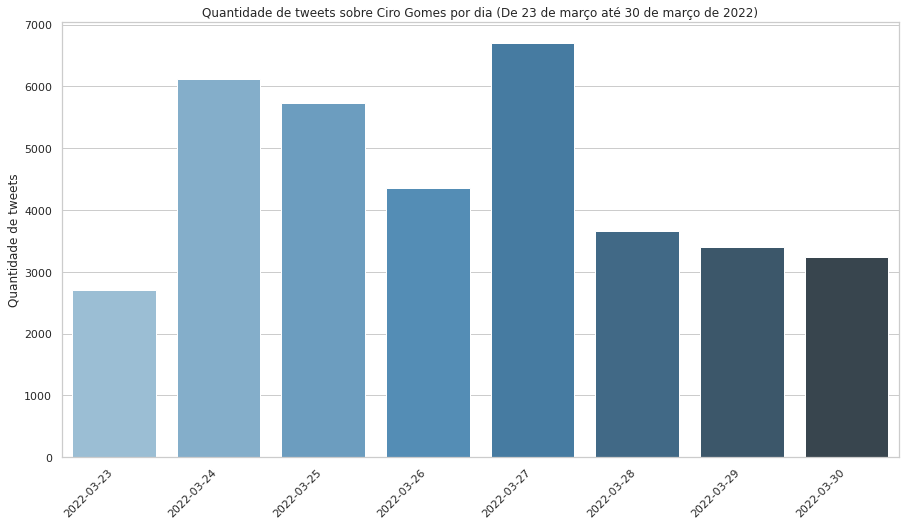

In [ ]:
#@markdown *Escolha o nome do candidato*
#@title Gráfico 1. Quantidade de tweets por dia

#@markdown **Candidatos**: bolsonaro, lula, ciro gomes e moro

Nome = 'ciro gomes' #@param {type:"string"}
Salvar = True #@param {type:"boolean"}
bar_graphic_time(Nome, Salvar)

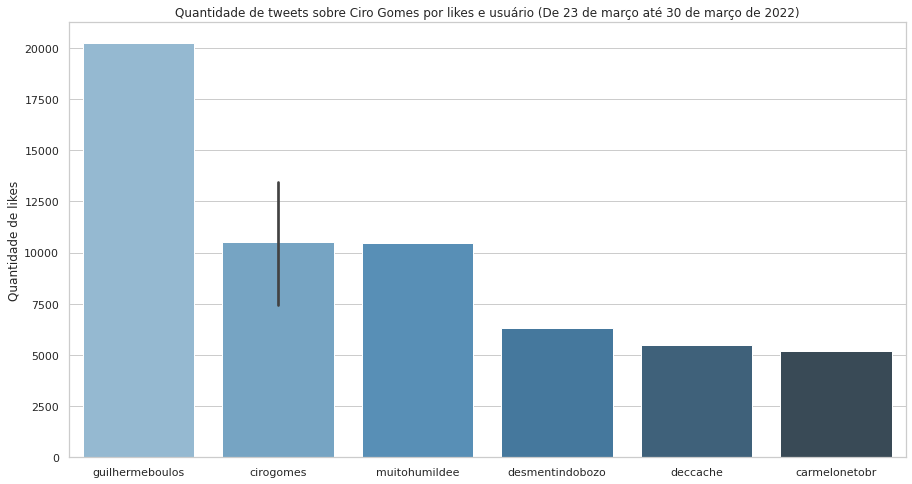

In [ ]:
#@markdown *Escolha o nome do candidato*
#@title Gráfico 2. Quantidade de tweets por categorias

#@markdown **Nomes**: bolsonaro, lula, ciro gomes e moro

#@markdown *Escolha o nome da categoria*

#@markdown **Categorias**: respostas, compartilhamentos, likes

Nome = 'ciro gomes' #@param {type:"string"}
Categoria = 'likes' #@param {type:"string"}

Salvar = True #@param {type:"boolean"}

bar_graphic_category(Nome, Categoria, Salvar)

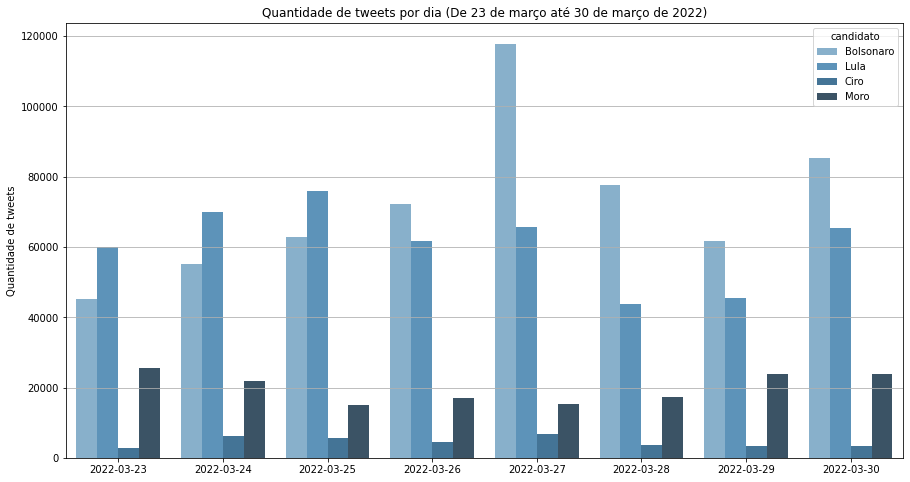

In [ ]:
#@title Grafico 3. Quantidade de tweets por dia todos os candidatos
df = data_joint(df1, df2, df3, df4)
bar_graphic_compare(df)

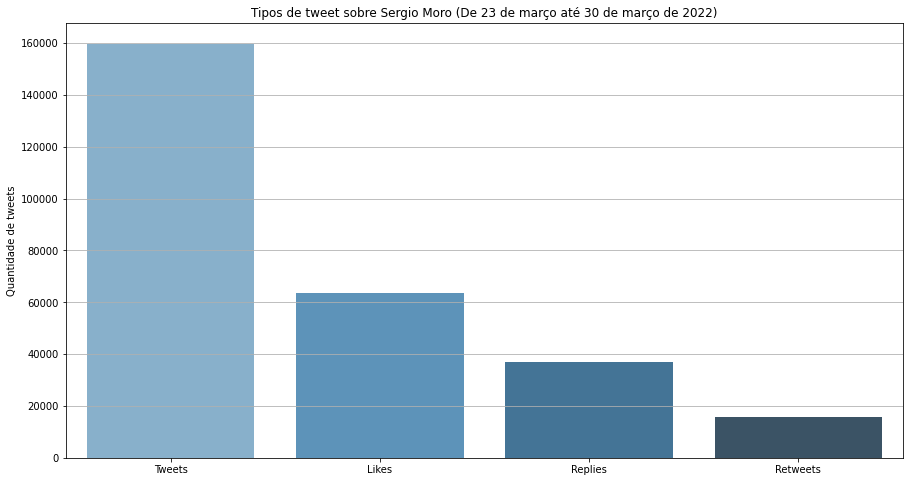

In [ ]:
#@markdown *Escolha o candidato abaixo*
#@title Gráfico 4. Quantidade de tweets por tipo

candidato = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]
Salvar = True #@param {type:"boolean"}

if candidato == 'Bolsonaro':
  nome = 'Bolsonaro'
  bar_graphic_type_tweets(df1, nome, Salvar)

if candidato == 'Lula':
  nome = 'Lula'
  bar_graphic_type_tweets(df2, nome, Salvar)

if candidato == 'Ciro':
  nome = 'Ciro Gomes'
  bar_graphic_type_tweets(df3, nome, Salvar)
  
if candidato == 'Moro':
  nome = 'Sergio Moro'
  bar_graphic_type_tweets(df4, nome, Salvar)



## 2. Tratamento dos dados NLP

### 2. 1 Data Cleaning

In [ ]:
#@title 2.2 NLTK and EMOT install 
#import NLTK and download
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')


#install EMOT library
!pip install emot  &> /dev/null
#install vader sentiment library
!pip install vaderSentiment &> /dev/null
!pip install unidecode &> /dev/null
!pip install autocorrect &> /dev/null

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [ ]:
#@title 2.3 Libraries import

import datetime as dt
import numpy as np
import string
import unidecode
from autocorrect import Speller
spell = Speller(lang='pt')

#cleaning
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

# Sentiment Scoring
from textblob import TextBlob

# library for transform the emojis and emoticons
import emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS


dictionary for this language not found, downloading...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
#@title 2.4 Transform EMOJIS in sentiment

# criar função para armazenar lista de emojis e emoticons

emojis = []
emotis = []
emot_obj = emot.core.emot()
lista_comentarios = df2['tweet'].tolist()

def localiza_emoji_emoti(text):  
    emoji = emot_obj.emoji(text)
    emoti = emot_obj.emoticons(text)
    
    if emoji['flag'] == True:
        emojis.append(emoji['value'])
        
    try:
        if emoti['flag'] == True:
            emotis.append(emoti['value'])
    except:
        emotis.append('nada')

# aplicando a função na lista de comentários
for txt in lista_comentarios:
    localiza_emoji_emoti(txt)

# removendo duplicidade dos emojis e emoticos
lista_emojis = []
lista_emotis = []

for linha in emojis:
    for emoji in linha:
        if emoji not in lista_emojis:
            lista_emojis.append(emoji)
            
for linha in emotis:
    for emoti in linha:
        if emoti != 'nada' and emoti not in lista_emotis:
            lista_emotis.append(emoti)
            
len(lista_emojis), len(lista_emotis)

# criar dois dicionários com as interpretações, um para emojis outro para emoticons
dict_emojis = {
    'exclamation_question_mark': 'ruim',
    'person_pouting': 'ruim',
    'kiss_mark': 'ótimo',
    'upside-down_face': 'ótimo',
    'smiling_face_with_open_mouth_&_smiling_eyes': 'ótimo',
    'love_letter': 'ótimo',
    'rose': 'ótimo',
    'angry_face_with_horns': 'ruim',
    'yellow_heart': 'ótimo',
    'blue_heart': 'ótimo',
    'green_heart': 'ótimo',
    'relieved_face': 'ótimo',
    'trophy': 'ótimo',
    'expressionless_face': 'ruim',
    'slightly_smiling_face': 'ótimo',
    'nauseated_face': 'ruim',
    'face_with_stuck-out_tongue_&_winking_eye': 'ótimo',
    'OK_hand': 'ótimo',
    'neutral_face': 'ruim',
    'person_shrugging': 'ruim',
    'weary_face': 'ruim',
    'heart_with_arrow': 'ótimo',
    'grimacing_face': 'ruim',
    'sleepy_face': 'ruim',
    'pig_face': 'ruim',
    'thinking_face': 'ruim',
    'loudly_crying_face': 'ruim',
    'blossom': 'ótimo',
    'face_with_cold_sweat': 'ruim',
    'crying_cat_face': 'ruim',
    'unamused_face': 'ruim',
    'disappointed_but_relieved_face': 'ruim',
    'smiling_face': 'ótimo',
    'face_screaming_in_fear': 'ruim',
    'face_with_steam_from_nose': 'ruim',
    'broken_heart': 'ruim',
    'see-no-evil_monkey': 'ruim',
    'two_hearts': 'ótimo',
    'growing_heart': 'ótimo',
    'slightly_frowning_face': 'ruim',
    'crying_face': 'ruim',
    'dizzy': 'ruim',
    'smiling_face_with_open_mouth_&_closed_eyes': 'ótimo',
    'victory_hand': 'ótimo',
    'face_with_rolling_eyes': 'ruim',
    'revolving_hearts': 'ótimo',
    'smiling_face_with_open_mouth': 'ótimo',
    'rolling_on_the_floor_laughing': 'ótimo',
    'pensive_face': 'ruim',
    'dizzy_face': 'ruim',
    'angry_face': 'ruim',
    'confused_face': 'ruim',
    'smiling_face_with_open_mouth_&_cold_sweat': 'ótimo',
    'smirking_face': 'ótimo',
    'smiling_face_with_sunglasses': 'ótimo',
    'face_with_tears_of_joy': 'ótimo',
    'white_medium_star': 'ótimo',
    'thumbs_down': 'ruim',
    'red_heart': 'ótimo',
    'clapping_hands': 'ótimo',
    'smiling_face_with_halo': 'ótimo',
    'purple_heart': 'ótimo',
    'smiling_face_with_heart-eyes': 'ótimo',
    'heart_suit': 'ótimo',
    'hugging_face': 'ótimo',
    'glowing_star': 'ótimo',
    'smiling_face_with_smiling_eyes': 'ótimo',
    'grinning_face_with_smiling_eyes': 'ótimo',
    'thumbs_up': 'ótimo',
    'face_blowing_a_kiss': 'ótimo',
    'winking_face': 'ótimo',
    'smiling_face_with_hearts': 'ótimo',
    'clown_face': 'ruim'
}

dict_emotis = {
    'Wink or smirk': 'ótimo',
    'Happy face or smiley': 'ótimo',
    'Tongue sticking out, cheeky, playful or blowing a raspberry': 'ótimo',
    'Frown, sad, andry or pouting': 'ruim',
    'Skeptical, annoyed, undecided, uneasy or hesitant': 'ruim'
}

len(dict_emojis), len(dict_emotis)
# dos 105 emojis, 71 foram traduzidos. Os emoticons foram todos traduzidos

Issue with internal pattern finding emoji: '🇧'


(73, 5)

In [ ]:
#@title 2.5 Pre processing

#clean the tweets
def pre_processing(text):

  #remove special caractheres 
  pat1 = r'@[^ ]+'                   
  pat2 = r'https?://[A-Za-z0-9./]+'  
  pat3 = r'\'s'                      
  pat4 = r'\#\w+'                     
  pat5 = r'&amp '
  pat6 = r'(.)\1{3,}'                              
  combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))
  text = re.sub(combined_pat,"",text).lower()
  text = unidecode.unidecode(text)
  text = "".join([i for i in text if i not in string.punctuation])
  for emot_obj in UNICODE_EMOJI:
    text = text.replace(emot_obj, UNICODE_EMOJI[emot_obj])
    text = text.replace(':', ' ')

  lista = text.split(' ')
  for x in range(len(lista)):
      chave = lista[x]
      if chave in dict_emojis:
          lista[x] = dict_emojis[chave]
      if chave in dict_emotis:
          lista[x] = dict_emotis[chave]
          
  text = ' '
  text = (text.join(lista)) 
  text.strip()

  return text

def remove_stopwords (text):
  #remove stopwords
  stopwords = nltk.corpus.stopwords.words('portuguese')
  newStopWords = ['q','vc', 'pq', 'rs', 's', 'fud', 'pra', 'ei', 'tá', 'vai', 'pa', 've', 'ta', 'é', 'to', 'tb', 'ir']
  stopwords.extend(newStopWords)
  palavras = [i for i in text.split() if not i in stopwords]

  text = (" ".join(palavras))

  return text

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [ ]:
'''
pre processing in Bolsonaro dataset
time estimate ~11 minutes
'''
df1["cleaned_tweet"] = df1["tweet"].apply(lambda x:pre_processing(x)).apply(lambda x:remove_stopwords(x))

In [ ]:
'''
pre processing in Lula dataset
time estimate ~10 minutes
'''
df2["cleaned_tweet"] = df2["tweet"].apply(lambda x:pre_processing(x)).apply(lambda x:remove_stopwords(x))

In [ ]:
'''
pre processing in Ciro Gomes dataset
time estimate 40 seconds
'''
df3["cleaned_tweet"] = df3["tweet"].apply(lambda x:pre_processing(x)).apply(lambda x:remove_stopwords(x))

In [ ]:
'''
pre processing in Moro dataset
time estimate ~3 minutes
'''
df4["cleaned_tweet"] = df4["tweet"].apply(lambda x:pre_processing(x)).apply(lambda x:remove_stopwords(x))

In [ ]:
#@title 2.6 Save all the dataset cleaned in google drive
df1.to_csv(PATH_DATA + 'interim' + '/bolsonaro_tratado.csv', sep=';', index=False)
df2.to_csv(PATH_DATA + 'interim' + '/lula_tratado.csv', sep=';', index=False)
df3.to_csv(PATH_DATA + 'interim' + '/ciro_tratado.csv', sep=';', index=False)
df4.to_csv(PATH_DATA + 'interim' + '/moro_tratado.csv', sep=';', index=False)

In [ ]:
#@title 2.7 Read all datasets cleaned
df1 = pd.read_csv(PATH_DATA +  'interim' + '/bolsonaro_tratado.csv', sep=';')
df2 = pd.read_csv(PATH_DATA +  'interim' + '/lula_tratado.csv', sep=';')
df3 = pd.read_csv(PATH_DATA +  'interim' + '/ciro_tratado.csv', sep=';')
df4 = pd.read_csv(PATH_DATA +  'interim' + '/moro_tratado.csv', sep=';')

## 3. Classifications models

In [ ]:
#@title 3.1 Analisy sentiment using TextBlob
print("Running sentiment process")
#@markdown Choose the candidate you want to create sentiment column
def create_sentiment (data):
  for row in data.itertuples():
    tweet = data.at[row[0], 'cleaned_tweet']
    #textEN = Translator().translate(textPT, dest='en')
  #run sentiment using TextBlob
    analysis = TextBlob((tweet))
    analysis.ngrams(n=3)
  #set value to dataframe
    data.at[row[0], 'polarity'] = analysis.sentiment[0]
    data.at[row[0], 'subjectivity'] = analysis.sentiment[1]
  #Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        data.at[row[0], 'Sentiment'] = 1
    elif analysis.sentiment[0]<0:
        data.at[row[0], 'Sentiment'] = -1
    else:
        data.at[row[0], 'Sentiment'] = 0
  return data

candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  df_blob_b = create_sentiment(df1)

if candidate == 'Lula':
  df_blob_l = create_sentiment(df2)

if candidate == 'Ciro':
  df_blob_c = create_sentiment(df3)
  
if candidate == 'Moro':
  df_blob_m = create_sentiment(df4)

print ('Finish!!!')


Running sentiment process
Finish!!!


In [ ]:
#@title Sentiment Analisys using Vader Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


def create_sentiment_vader (text):
  result = analyzer.polarity_scores(text)['compound']
  return result

def analise2(score):
  if (score >= -0.05) & (score <= 0.05):
    return 'neutral'
  elif score > 0.05:
    return 'positive'
  return 'negative'

candidate = 'Bolsonaro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  df_blob_b['vader'] = df_blob_b['cleaned_tweet'].apply(create_sentiment_vader)
  df_blob_b['new_sentiment'] = df_blob_b['vader'].apply(analise2)

if candidate == 'Lula':
  df_blob_l['vader'] = df_blob_l['cleaned_tweet'].apply(create_sentiment_vader)
  df_blob_l['new_sentiment'] = df_blob_l['vader'].apply(analise2)

if candidate == 'Ciro':
  df_blob_c['vader'] = df_blob_c['cleaned_tweet'].apply(create_sentiment_vader)
  df_blob_c['new_sentiment'] = df_blob_c['vader'].apply(analise2)
  
if candidate == 'Moro':
  df_blob_m['vader'] = df_blob_m['cleaned_tweet'].apply(create_sentiment_vader)
  df_blob_m['new_sentiment'] = df_blob_m['vader'].apply(analise2)



In [ ]:
#@title 3.2 Save all the dataset with the sentiment analisys in google drive
df_blob_b.to_csv(PATH_DATA + 'interim' + '/bolsonaro_tratado_sentiment.csv', sep=';', index=False)
print ('the sentiment analisy for the BOLSONARO dataset has saved in {}interim/'.format (PATH_DATA))
df_blob_l.to_csv(PATH_DATA + 'interim' + '/lula_tratado_sentiment.csv', sep=';', index=False)
print ('the sentiment analisy for the LULA dataset has saved in {}interim/'.format (PATH_DATA))
df_blob_c.to_csv(PATH_DATA + 'interim' + '/ciro_tratado_sentiment.csv', sep=';', index=False)
print ('the sentiment analisy for the CIRO dataset has saved in {}interim/'.format (PATH_DATA))
df_blob_m.to_csv(PATH_DATA + 'interim' + '/moro_tratado_sentiment.csv', sep=';', index=False)
print ('the sentiment analisy for the MORO dataset has saved in {}interim/'.format (PATH_DATA))

the sentiment analisy for the BOLSONARO dataset has saved in /content/drive/MyDrive/Colab Notebooks/project_politics/data/interim/
the sentiment analisy for the LULA dataset has saved in /content/drive/MyDrive/Colab Notebooks/project_politics/data/interim/
the sentiment analisy for the CIRO dataset has saved in /content/drive/MyDrive/Colab Notebooks/project_politics/data/interim/
the sentiment analisy for the MORO dataset has saved in /content/drive/MyDrive/Colab Notebooks/project_politics/data/interim/


In [ ]:
#@title 3.3 Read all datasets with sentiment analisys (Opcional)
df_blob_b = pd.read_csv(PATH_DATA +  'interim' + '/bolsonaro_tratado_sentiment.csv', sep=';')
df_blob_l = pd.read_csv(PATH_DATA +  'interim' + '/lula_tratado_sentiment.csv', sep=';')
df_blob_c = pd.read_csv(PATH_DATA +  'interim' + '/ciro_tratado_sentiment.csv', sep=';')
df_blob_m = pd.read_csv(PATH_DATA +  'interim' + '/moro_tratado_sentiment.csv', sep=';')

### 4 Classificação usando Word2Vec

In [ ]:
#@title 4.1 Import libraries

pd.options.mode.chained_assignment = None

from copy import deepcopy
from string import punctuation
from random import shuffle
import pickle
import h5py
import json
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np

import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
from nltk import word_tokenize

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
#from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.models import model_from_json


# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [ ]:
#@title 4.2 Post Process

tokenizer = TweetTokenizer()


def tokenize (tweet):
  try:
    tokens = tokenizer.tokenize(tweet)
    return tokens
  except:
    return 'NC'

def postprocess(data):
  data['tokens'] = data['cleaned_tweet'].progress_map(tokenize)
  data = data[data.tokens != 'NC']
  data.reset_index(inplace=True)
  data.drop('index', inplace=True, axis=1)
  return data 


candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  df_pos_b = df_blob_b.loc[df_blob_b['Sentiment'] == 1]
  df_neg_b = df_blob_b.loc[df_blob_b['Sentiment'] == -1]
  df_filter_b = df_pos_b.append(df_neg_b)
  df_b = postprocess(df_filter_b)

if candidate == 'Lula':
  df_pos_l = df_blob_l.loc[df_blob_l['Sentiment'] == 1]
  df_neg_l = df_blob_l.loc[df_blob_l['Sentiment'] == -1]
  df_filter_l = df_pos_l.append(df_neg_l)
  df_l= postprocess(df_filter_l)

if candidate == 'Ciro':
  df_pos_c = df_blob_c.loc[df_blob_c['Sentiment'] == 1]
  df_neg_c = df_blob_c.loc[df_blob_c['Sentiment'] == -1]
  df_filter_c = df_pos_c.append(df_neg_c)
  df_c = postprocess(df_filter_c)
  
if candidate == 'Moro':
  df_pos_m = df_blob_m.loc[df_blob_m['Sentiment'] == 1]
  df_neg_m = df_blob_m.loc[df_blob_m['Sentiment'] == -1]
  df_filter_m = df_pos_m.append(df_neg_m)
  df_m = postprocess(df_filter_m)



progress-bar: 100%|██████████| 5963/5963 [00:00<00:00, 11199.27it/s]


In [ ]:
#@title 4.3 Split in training and test the datasets
LabeledSentence = gensim.models.doc2vec.LabeledSentence # we'll talk about this down below
def labelizeTweets(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

#training and test split the datasets
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(np.array(df_b.tokens),
                                                    np.array(df_b.Sentiment), test_size=0.3)

x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(np.array(df_l.tokens),
                                                    np.array(df_l.Sentiment), test_size=0.3)

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(np.array(df_c.tokens),
                                                    np.array(df_c.Sentiment), test_size=0.3)

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(np.array(df_m.tokens),
                                                    np.array(df_m.Sentiment), test_size=0.3)

x_train_b = labelizeTweets(x_train_b, 'TRAIN')
x_test_b = labelizeTweets(x_test_b, 'TEST')

x_train_l = labelizeTweets(x_train_l, 'TRAIN')
x_test_l = labelizeTweets(x_test_l, 'TEST')

x_train_c = labelizeTweets(x_train_c, 'TRAIN')
x_test_c = labelizeTweets(x_test_c, 'TEST')

x_train_m = labelizeTweets(x_train_m, 'TRAIN')
x_test_m = labelizeTweets(x_test_m, 'TEST')

data_labellised_b = labelizeTweets(np.array(df_b.tokens), 'data')
data_labellised_l = labelizeTweets(np.array(df_l.tokens), 'data')
data_labellised_c = labelizeTweets(np.array(df_c.tokens), 'data')
data_labellised_m = labelizeTweets(np.array(df_m.tokens), 'data')

19172it [00:00, 28174.60it/s]
8217it [00:00, 180344.71it/s]
14848it [00:00, 230507.10it/s]
6364it [00:00, 181546.16it/s]
1012it [00:00, 230348.71it/s]
434it [00:00, 225595.23it/s]
4174it [00:00, 237431.68it/s]
1789it [00:00, 267794.78it/s]
27389it [00:00, 78239.76it/s]
21212it [00:00, 274062.87it/s]
1446it [00:00, 120686.19it/s]
5963it [00:00, 249050.37it/s]


In [ ]:
#@title 4.4 Bluid vocabulary Word2Vec and training
n_dim = 300
epochs = 10
tweet_w2v_b = Word2Vec(size=n_dim)
tweet_w2v_b.build_vocab([x.words for x in tqdm(data_labellised_b)])
tweet_w2v_b.train([x.words for x in tqdm(data_labellised_b)], total_examples=tweet_w2v_b.corpus_count, epochs=epochs)


tweet_w2v_l = Word2Vec(size=n_dim)
tweet_w2v_l.build_vocab([x.words for x in tqdm(data_labellised_l)])
tweet_w2v_l.train([x.words for x in tqdm(data_labellised_l)], total_examples=tweet_w2v_l.corpus_count, epochs=epochs)


tweet_w2v_c = Word2Vec(size=n_dim)
tweet_w2v_c.build_vocab([x.words for x in tqdm(data_labellised_c)])
tweet_w2v_c.train([x.words for x in tqdm(data_labellised_c)], total_examples=tweet_w2v_c.corpus_count, epochs=epochs)


tweet_w2v_m = Word2Vec(size=n_dim)
tweet_w2v_m.build_vocab([x.words for x in tqdm(data_labellised_m)])
tweet_w2v_m.train([x.words for x in tqdm(data_labellised_m)], total_examples=tweet_w2v_m.corpus_count, epochs=epochs)

100%|██████████| 5963/5963 [00:00<00:00, 926354.12it/s]


(686339, 990460)

In [ ]:
#@markdown The similar words
name = 'bolsonaro' #@param {type:'string'}
def similar_words (candidate):
  print (tweet_w2v_b.most_similar(candidate))

similar_words(name)

[('bozo', 0.6044641733169556), ('tud', 0.49991944432258606), ('conquistar', 0.4957876205444336), ('acostumando', 0.4661160707473755), ('luladrao', 0.4602675437927246), ('votasse', 0.4513884484767914), ('levanta', 0.4503833055496216), ('casamento', 0.44029974937438965), ('ansiosa', 0.43967533111572266), ('furia', 0.43696117401123047)]


In [ ]:
#@title 4.5 Save the Word2Vec model
tweet_w2v_b.save(PATH_MODELS + '/w2vmodel_bolsonaro')
tweet_w2v_l.save(PATH_MODELS + '/w2vmodel_lula')
tweet_w2v_c.save(PATH_MODELS + '/w2vmodel_ciro')
tweet_w2v_m.save(PATH_MODELS + '/w2vmodel_moro')
#Load the w2v model
# new_w2vmodel = gensim.models.Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/project_politics/w2vmodel')

In [ ]:
#@title 4.6 Defining the chart
def similar_words_graphic (data, name):
  output_notebook()
  plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
                          tools="pan,wheel_zoom,box_zoom,reset,hover,save",
                          x_axis_type=None, y_axis_type=None, min_border=1)

  # getting a list of word vectors. limit to 10000. each is of 200 dimensions
  word_vectors = [data[w] for w in list(data.wv.vocab.keys())[:5000]]

  # dimensionality reduction. converting the vectors to 2d vectors
  from sklearn.manifold import TSNE
  tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
  tsne_w2v = tsne_model.fit_transform(word_vectors)

  # putting everything in a dataframe
  tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
  tsne_df['words'] = list(data.wv.vocab.keys())[:5000]

  # plotting. the corresponding word appears when you hover on the data point.
  plot_tfidf.scatter(x='x', y='y', source=tsne_df)
  hover = plot_tfidf.select(dict(type=HoverTool))
  hover.tooltips={"word": "@words"}
  plt.savefig (PATH_IMAGES + '{}_similar_words_graphic.png'.format (name))
  show(plot_tfidf)

candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  name = 'bolsonaro'
  similar_words_graphic(tweet_w2v_b, name)

if candidate == 'Lula':
  name = 'lula'
  similar_words_graphic(tweet_w2v_l, name)

if candidate == 'Ciro':
  name = 'ciro'
  similar_words_graphic(tweet_w2v_c, name)
  
if candidate == 'Moro':
  name = 'moro'
  similar_words_graphic(tweet_w2v_m, name)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2984 samples in 0.001s...
[t-SNE] Computed neighbors for 2984 samples in 0.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2984
[t-SNE] Computed conditional probabilities for sample 2000 / 2984
[t-SNE] Computed conditional probabilities for sample 2984 / 2984
[t-SNE] Mean sigma: 0.015954
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.956631
[t-SNE] KL divergence after 1000 iterations: 0.558494


<Figure size 432x288 with 0 Axes>

## 5 Frequency words

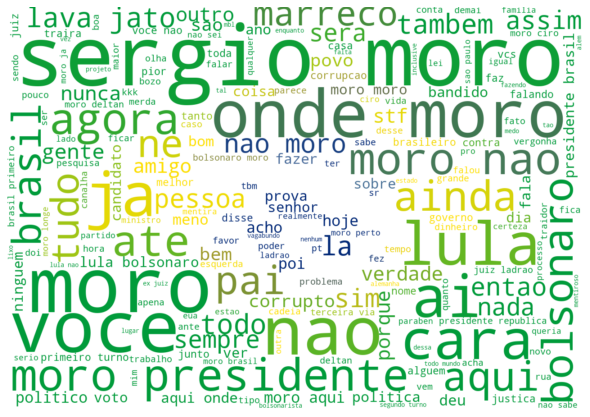

In [ ]:
#@title 5.1 Word Cloud Graphic
from PIL import Image


def wordcloud_graphic (data, name):
  comment_words = ''
  mask = np.array(Image.open(PATH_IMAGES + '/Flag_of_Brazil.svg.png'))


  for val in data.cleaned_tweet:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
 
  wordcloud = WordCloud(width = 800, 
                        height = 800,
                        background_color ='white',
                        mask = mask,
                        min_font_size = 10).generate(comment_words)

  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  image_colors = ImageColorGenerator(mask)
  plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.savefig(PATH_IMAGES + '{}_wordcloud_graphic.png'.format (name))
  plt.show()


# mask = np.array(Image.open("img/spain.png"))
# wordcloud_spa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(spa)

# # create coloring from image
# image_colors = ImageColorGenerator(mask)
# plt.figure(figsize=[7,7])
# plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")

candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  name = 'bolsonaro'
  wordcloud_graphic(df_blob_b, name)

if candidate == 'Lula':
  name = 'lula'
  wordcloud_graphic(df_blob_l, name)

if candidate == 'Ciro':
  name = 'ciro'
  wordcloud_graphic(df_blob_c, name)
  
if candidate == 'Moro':
  name = 'moro'
  wordcloud_graphic(df_blob_m, name)

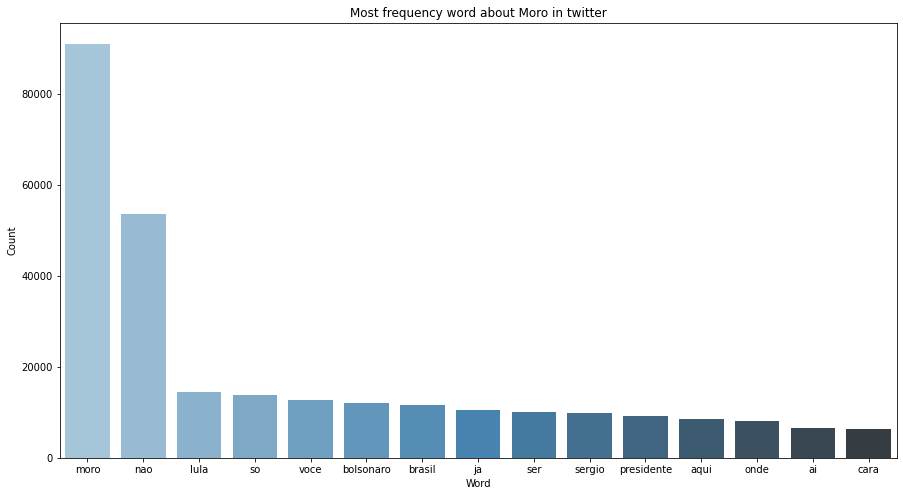

In [ ]:
#@title 5.2 Most Frequency words
from nltk.tokenize import wordpunct_tokenize
from nltk.probability import FreqDist

def frequency_words (data, name):
  tokens = data['cleaned_tweet']

  def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

  X_train_tokens = _tokenize_text(tokens)

  #frequencia de palavras 
  def _get_freq_dist_list(tokens):
      ls = []

      for tk_line in tokens:
          for word in tk_line:
              ls.append(word)

      return ls

  #distribuição de frequencia nos dados de treino coletados
  fd_list = _get_freq_dist_list(X_train_tokens)
  fdist = FreqDist(fd_list)
  most_common = fdist.most_common(15)
  # print most common words
  plt.figure(figsize = (15,8))
  series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
  plt.title('Most frequency word about {} in twitter'.format (name))
  ax = sns.barplot(series.index, series.values,
              palette="Blues_d")
  ax.set_xlabel('Word')
  ax.set_ylabel('Count')
  #plt.savefig('/content/drive/MyDrive/Colab Notebooks/project_politics/img/{}_most_frequency_graphic.png'.format (name))
  plt.show()


candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  name = 'Bolsonaro'
  frequency_words(df_blob_b, name)

if candidate == 'Lula':
  name = 'Lula'
  frequency_words(df_blob_l, name)

if candidate == 'Ciro':
  name = 'Ciro'
  frequency_words(df_blob_c, name)
  
if candidate == 'Moro':
  name = 'Moro'
  frequency_words(df_blob_m, name)


In [ ]:
df_blob_b.head()

,date,username,place,tweet,language,respostas,compartilhamento,likes,hashtags,Quantidade de tweets,cleaned_tweet,polarity,subjectivity,Sentiment,tweet_tokens
0,2022-03-30,anamari79540976,NaN,@jandira_feghali Bolsonaro reeleito no primeir...,pt,0,0.0,3,[],1.0,bolsonaro reeleito primeiro turno,0.0,0.0,0.0,['bolsonaro reeleito primeiro turno']
1,2022-03-30,osvaldopaulin15,NaN,@PaolaSDaniel @FlviaLeo16 @jairbolsonaro Se nã...,pt,6,1.0,28,[],1.0,nao abandonou porque nao faz nada,0.0,0.0,0.0,['nao abandonou porque nao faz nada']
2,2022-03-30,chrystiancf79,NaN,@deltanmd Virou politiqueiro da pior espécie i...,pt,0,0.0,0,[],1.0,virou politiqueiro pior especie igual amigo mo...,0.0,0.0,0.0,['virou politiqueiro pior especie igual amigo ...
3,2022-03-30,luiz_scapechi,NaN,@revistaoeste Esse filho do Presidente Bolsona...,pt,0,0.0,0,[],1.0,filho presidente bolsonaro falta bom senso ele...,0.0,0.0,0.0,['filho presidente bolsonaro falta bom senso e...
4,2022-03-30,512kkk,NaN,@sonagaveta @PDanuzo @Miltonneves Esse povo go...,pt,2,0.0,0,[],1.0,povo gosta narrativa inventaram falam mal bols...,0.0,0.0,0.0,['povo gosta narrativa inventaram falam mal bo...


## 6 Training the model

In [ ]:
#@title 6.1 BUILDIND TF-IDF MATRIX

def tf_idf_create (candidate):
  vectorizer = TfidfVectorizer(analyzer=lambda x: x)
  matrix = vectorizer.fit_transform([x.words for x in candidate])
  result = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
  return result

candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  nome = 'Bolsonaro'
  print ('building tf-idf matrix for {}'.format (nome))
  tfidf = tf_idf_create(data_labellised_b)
  print (('vocab size :', len(tfidf)))

if candidate == 'Lula':
  nome = 'Lula'
  print ('building tf-idf matrix for {}'.format (nome))
  tfidf = tf_idf_create(data_labellised_l)
  print (('vocab size :', len(tfidf)))

if candidate == 'Ciro':
  nome = 'Ciro'
  print ('building tf-idf matrix for {}'.format (nome))
  tfidf = tf_idf_create(data_labellised_c)
  print (('vocab size :', len(tfidf)))
  
if candidate == 'Moro':
  nome = 'Moro'
  print ('building tf-idf matrix for {}'.format (nome))
  tfidf = tf_idf_create(data_labellised_m)
  print (('vocab size :', len(tfidf)))



building tf-idf matrix for Moro
('vocab size :', 16375)


In [ ]:
#@title 6.2 Build word vector
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += tweet_w2v_b[word].reshape((1, size)) * tfidf[word] #combining w2v vectors with tfidf value of words in the tweet.
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
#@title 6.3 Concatenate the build vectors

def training_model (train_model, test_model):
  train = np.concatenate([buildWordVector(z, n_dim) for z in tqdm(map(lambda x: x.words, train_model))])
  train = scale(train)

  test = np.concatenate([buildWordVector(z, n_dim) for z in tqdm(map(lambda x: x.words, test_model))])
  test = scale(test)
  return train, test


candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  nome = 'Bolsonaro'
  print ('Training the model for {}'.format (nome))
  train_vecs_w2v_b, test_vecs_w2v_b = training_model(x_train_b, x_test_b)

if candidate == 'Lula':
  nome = 'Lula'
  print ('Training the model for {}'.format (nome))
  train_vecs_w2v_l, test_vecs_w2v_l = training_model(x_train_l, x_test_l)

if candidate == 'Ciro':
  nome = 'Ciro'
  print ('Training the model for {}'.format (nome))
  train_vecs_w2v_c, test_vecs_w2v_c = training_model(x_train_c, x_test_c)
  
if candidate == 'Moro':
  nome = 'Moro'
  print ('Training the model for {}'.format (nome))
  train_vecs_w2v_m, test_vecs_w2v_m = training_model(x_train_m, x_test_m)

Training the model for Moro


4174it [00:01, 2738.14it/s]
1789it [00:00, 2878.78it/s]


In [ ]:
#@title 6.4 Training the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=n_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

def dl_training (train_vec, train):
  
  return model.fit(train_vec, train, epochs=200, batch_size=10000, verbose=2)

candidate = 'Bolsonaro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  nome = 'Bolsonaro'
  print ('Training the model for {}'.format (nome))
  dl_training(train_vecs_w2v_b, y_train_b)

if candidate == 'Lula':
  nome = 'Lula'
  print ('Training the model for {}'.format (nome))
  dl_training(train_vecs_w2v_l, y_train_l)

if candidate == 'Ciro':
  nome = 'Ciro'
  print ('Training the model for {}'.format (nome))
  dl_training(train_vecs_w2v_c, y_train_c)
  
if candidate == 'Moro':
  nome = 'Moro'
  print ('Training the model for {}'.format (nome))
  dl_training(train_vecs_w2v_m, y_train_m) 

Training the model for Bolsonaro
Epoch 1/200
2/2 - 1s - loss: 0.8080 - accuracy: 0.6088 - 1s/epoch - 716ms/step
Epoch 2/200
2/2 - 0s - loss: 0.6754 - accuracy: 0.6030 - 68ms/epoch - 34ms/step
Epoch 3/200
2/2 - 0s - loss: 0.6419 - accuracy: 0.5927 - 78ms/epoch - 39ms/step
Epoch 4/200
2/2 - 0s - loss: 0.6222 - accuracy: 0.5779 - 69ms/epoch - 35ms/step
Epoch 5/200
2/2 - 0s - loss: 0.6048 - accuracy: 0.5634 - 80ms/epoch - 40ms/step
Epoch 6/200
2/2 - 0s - loss: 0.5882 - accuracy: 0.5523 - 84ms/epoch - 42ms/step
Epoch 7/200
2/2 - 0s - loss: 0.5749 - accuracy: 0.5451 - 68ms/epoch - 34ms/step
Epoch 8/200
2/2 - 0s - loss: 0.5598 - accuracy: 0.5420 - 79ms/epoch - 39ms/step
Epoch 9/200
2/2 - 0s - loss: 0.5460 - accuracy: 0.5406 - 86ms/epoch - 43ms/step
Epoch 10/200
2/2 - 0s - loss: 0.5322 - accuracy: 0.5375 - 85ms/epoch - 43ms/step
Epoch 11/200
2/2 - 0s - loss: 0.5183 - accuracy: 0.5390 - 73ms/epoch - 36ms/step
Epoch 12/200
2/2 - 0s - loss: 0.5034 - accuracy: 0.5364 - 85ms/epoch - 42ms/step
Epoch

### Pipeline

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/project_politics/')

### Evaluation

In [ ]:
#@title 6.5 Evaluating accuracy score

def score (test_vec, test):
  score = model.evaluate(test_vec, test, batch_size=128, verbose=2)
  print(model.metrics_names[0],": ",score[0],"\n",model.metrics_names[1],": ",score[1])
  return score

  


candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  name = 'Bolsonaro'
  print ('Accuracy the model for {}'.format (name))
  score_b = score(test_vecs_w2v_b, y_test_b)

if candidate == 'Lula':
  name = 'Lula'
  print ('Accuracy the model for {}'.format (name))
  score_l = score(test_vecs_w2v_l, y_test_l)

if candidate == 'Ciro':
  name = 'Ciro'
  print ('Accuracy the model for {}'.format (name))
  score_c = score(test_vecs_w2v_c, y_test_c)
  
if candidate == 'Moro':
  name = 'Moro'
  print ('Accuracy the model for {}'.format (name))
  score_m = score(test_vecs_w2v_m, y_test_m) 

Accuracy the model for Moro
14/14 - 0s - loss: -3.6691e+01 - accuracy: 0.2711 - 52ms/epoch - 4ms/step
loss :  -36.69148635864258 
 accuracy :  0.271101176738739


In [ ]:
#@title 6.6 Saving the model
def saving_model (candidate, name):
  candidate = model.to_json() # serialize model to JSON
  with open(PATH_MODELS + 'model_{}.json'.format (name), "w") as json_file:
      json_file.write(candidate)

  candidate.save_weights(PATH_MODELS + 'model_{}.h5'.format (name)) # serialize weights to HDF5
  print("Saved model to disk")

#Loading the model
# newmodel = model_from_json(open('model.json').read())
# newmodel.load_weights('smodel.h5')

candidate = 'Moro' #@param ["Bolsonaro", "Lula", "Ciro", "Moro"]

if candidate == 'Bolsonaro':
  nome = 'Bolsonaro'
  print ('Accuracy the model for {}'.format (nome))
  score(test_vecs_w2v_b, y_test_b)

if candidate == 'Lula':
  nome = 'Lula'
  print ('Accuracy the model for {}'.format (nome))
  score(test_vecs_w2v_l, y_test_l)

if candidate == 'Ciro':
  nome = 'Ciro'
  print ('Accuracy the model for {}'.format (nome))
  score(test_vecs_w2v_c, y_test_c)
  
if candidate == 'Moro':
  nome = 'Moro'
  print ('Accuracy the model for {}'.format (nome))
  score(test_vecs_w2v_m, y_test_m) 

Saved model to disk


In [ ]:
test_X=np.array(df1.tweet_tokens)
test_y=np.array(df1.Sentiment)

In [ ]:
test_w2v_vecs = np.concatenate([buildWordVector(z, n_dim) for z in tqdm(map(lambda x:x, test_X))])


0it [00:00, ?it/s]
11895it [00:00, 118937.92it/s]
24057it [00:00, 120512.07it/s]
36109it [00:00, 118296.46it/s]
48383it [00:00, 120027.12it/s]
60391it [00:00, 111948.15it/s]
71671it [00:00, 109583.65it/s]
83635it [00:00, 112704.31it/s]
95736it [00:00, 115247.41it/s]
107307it [00:00, 111475.74it/s]
118505it [00:01, 100765.47it/s]
131304it [00:01, 108289.80it/s]
143365it [00:01, 111774.88it/s]
154721it [00:01, 110851.59it/s]
167794it [00:01, 116587.32it/s]
180868it [00:01, 120717.45it/s]
193396it [00:01, 122055.84it/s]
206803it [00:01, 125607.39it/s]
219805it [00:01, 126915.96it/s]
232535it [00:01, 125797.76it/s]
245143it [00:02, 124932.27it/s]
257657it [00:02, 113331.14it/s]
269202it [00:02, 100836.62it/s]
279643it [00:02, 94552.86it/s] 
289372it [00:02, 90713.39it/s]
298624it [00:02, 86793.00it/s]
307422it [00:02, 84177.15it/s]
317078it [00:02, 87446.13it/s]
328105it [00:03, 93697.88it/s]
337599it [00:03, 90055.04it/s]
346706it [00:03, 85457.44it/s]
355347it [00:03, 81251.36it/s]
3635

In [ ]:
# model.predict_classes(test_w2v_vecs)
score = model.evaluate(test_w2v_vecs,test_y, batch_size=128, verbose=2)
print(model.metrics_names[0],": ",score[0],"\n",model.metrics_names[1],": ",score[1])

4515/4515 - 4s - loss: 0.5056 - accuracy: 0.9507 - 4s/epoch - 996us/step
loss :  0.5055603981018066 
 accuracy :  0.9507299661636353


In [ ]:
query=np.array(df1.tweet_tokens)
query_w2v_vecs = np.concatenate([buildWordVector(z, n_dim) for z in tqdm(map(lambda x:x, query))])


0it [00:00, ?it/s]
7760it [00:00, 77587.31it/s]
15519it [00:00, 74346.02it/s]
22963it [00:00, 72344.63it/s]
30205it [00:00, 70355.07it/s]
37248it [00:00, 69557.85it/s]
44207it [00:00, 58196.11it/s]
50284it [00:00, 45811.64it/s]
55361it [00:01, 40651.72it/s]
59799it [00:01, 34792.34it/s]
63855it [00:01, 35771.55it/s]
67695it [00:01, 34588.14it/s]
71641it [00:01, 35758.23it/s]
75364it [00:01, 35880.83it/s]
79057it [00:01, 33454.93it/s]
83668it [00:01, 36746.75it/s]
90939it [00:02, 46314.70it/s]
98528it [00:02, 54544.44it/s]
105760it [00:02, 59595.56it/s]
113435it [00:02, 64550.45it/s]
120162it [00:02, 65342.54it/s]
127952it [00:02, 69035.81it/s]
135684it [00:02, 71485.79it/s]
143595it [00:02, 73749.51it/s]
151722it [00:02, 75987.41it/s]
159398it [00:02, 75506.11it/s]
166971it [00:03, 73343.96it/s]
174333it [00:03, 71508.20it/s]
181509it [00:03, 70318.28it/s]
188559it [00:03, 69222.40it/s]
195494it [00:03, 69189.15it/s]
202422it [00:03, 65836.34it/s]
209517it [00:03, 67284.87it/s]
216385

In [ ]:
#training the model
result=model.predict(query_w2v_vecs)

In [ ]:
countone=0
countzero=0
for i,j in enumerate(result):
    if result[i].item()==0:
        countzero += 1
    if result[i].item()==1:
        countone +=1
        
Positive_Tweets =(countone/len(result))*100
Negative_Tweets =(countzero/len(result))*100
print('Positive Tweets %: ',Positive_Tweets)
print('Negative Tweets %: ',Negative_Tweets)

Positive Tweets %:  0.17237321223365223
Negative Tweets %:  1.484209506140363


In [ ]:
len(result)

577816

In [ ]:
resultado = pd.DataFrame(result)

In [ ]:
t = pd.concat([df1, resultado], axis=1)

In [ ]:
t[['tweet', 0, 'Sentiment']].loc[t[0] == 0]

,tweet,0,Sentiment
141,Eu estapeei Bolsonaro a 45km/h! https://t.co...,0.0,0.0
225,"@NORDESTEPATRIO1 @jairbolsonaro @tarcisiogdf ""...",0.0,0.0
267,Todo mundo que apoiar e fizer campanha aberta ...,0.0,0.0
422,"@diogomainardi Mas Ministra, Bolsonaro é a pró...",0.0,0.0
570,Vc sabia? Bolsonaro instiga policiais contra i...,0.0,-1.0
...,...,...,...
577077,"Para o delírio da ESQUERDALHA, o mendigo que s...",0.0,0.0
577290,NaN,0.0,NaN
577305,"@GCasaroes Ñ parece ser bem isso, meu caro! O...",0.0,0.0
577550,@Maddnezz2 @hcalvim @o_antagonista @LulaOficia...,0.0,0.0


In [ ]:
t.isnull().sum()

date                     73796
username                 73796
place                   651576
tweet                    73796
language                 73796
respostas                73796
compartilhamento         73796
likes                    73796
hashtags                 73796
Quantidade de tweets     73796
cleaned_tweet            73796
polarity                 73796
subjectivity             73796
Sentiment                73796
tweet_tokens             73796
0                        73796
dtype: int64

### 2.3 Outras técnicas

In [ ]:
df = df3.copy()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["cleaned_tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["cleaned_tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["cleaned_tweet"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["cleaned_tweet"]]
df.head()

,date,username,place,tweet,language,respostas,compartilhamento,likes,hashtags,Quantidade de tweets,cleaned_tweet,Positive,Negative,Neutral,Compound
8632,2022-03-30,belemjameson,NaN,@leiladovolei @PDT_Nacional A @leiladovolei é ...,pt,0,0,9,[],1,pdt futura governadora vem somar trincheiras t...,0.0,0.0,1.0,0.0
8633,2022-03-30,marciliozeh,NaN,@thiamparo O cara das malas de dinheiro roubad...,pt,0,0,1,[],1,cara malas dinheiro roubado aliandose pt vê an...,0.0,0.0,1.0,0.0
8634,2022-03-30,torresbetotada,NaN,@cirogomes @CaboDaciolo Tem q fazer recortes e...,pt,0,0,0,[],1,q fazer recortes vídeos falas fazem efeitos q ...,0.0,0.0,1.0,0.0
8635,2022-03-30,jamielawson80s,NaN,@cirogomes @CaboDaciolo @gisellebezerra Sim. E...,pt,0,0,0,[],1,sim ursal,0.0,0.0,1.0,0.0
8636,2022-03-30,roneysoares14,NaN,@jonesmanoel_PCB Eu tô fora!!! Vou de @cirogom...,pt,3,3,54,[],1,tô fora vou,0.0,0.0,1.0,0.0


In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,date,username,place,tweet,language,respostas,compartilhamento,likes,hashtags,Quantidade de tweets,cleaned_tweet,Positive,Negative,Neutral,Compound,Sentiment
8632,2022-03-30,belemjameson,NaN,@leiladovolei @PDT_Nacional A @leiladovolei é ...,pt,0,0,9,[],1,pdt futura governadora vem somar trincheiras t...,0.0,0.0,1.0,0.0,Neutral
8633,2022-03-30,marciliozeh,NaN,@thiamparo O cara das malas de dinheiro roubad...,pt,0,0,1,[],1,cara malas dinheiro roubado aliandose pt vê an...,0.0,0.0,1.0,0.0,Neutral
8634,2022-03-30,torresbetotada,NaN,@cirogomes @CaboDaciolo Tem q fazer recortes e...,pt,0,0,0,[],1,q fazer recortes vídeos falas fazem efeitos q ...,0.0,0.0,1.0,0.0,Neutral
8635,2022-03-30,jamielawson80s,NaN,@cirogomes @CaboDaciolo @gisellebezerra Sim. E...,pt,0,0,0,[],1,sim ursal,0.0,0.0,1.0,0.0,Neutral
8636,2022-03-30,roneysoares14,NaN,@jonesmanoel_PCB Eu tô fora!!! Vou de @cirogom...,pt,3,3,54,[],1,tô fora vou,0.0,0.0,1.0,0.0,Neutral


In [ ]:
#@title esboço


#clean the tweets
def clean_text(text): 
    pat1 = r'@[^ ]+'                   
    pat2 = r'https?://[A-Za-z0-9./]+'  
    pat3 = r'\'s'                      
    pat4 = r'\#\w+'                     
    pat5 = r'&amp '                              
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()

# remove accented characters
def accented_characters_removal(text):
  # Remove accented characters from text using unidecode.
  # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
  text = unidecode.unidecode(text)
  return text

#remove stopwords
def RemoveStopWords(text):
  #add new words in stopword list
  stopwords = nltk.corpus.stopwords.words('portuguese')
  newStopWords = ['q','vc', 'pq', 'rs', 's', 'fud', 'pra', 'ei', 'tá', 'vai', 'pa', 've']
  stopwords.extend(newStopWords)
  palavras = [i for i in text.split() if not i in stopwords]
  return (" ".join(palavras))

#translate the emojis for sentiment
def traduzir_emoti_emoji(text):
    for emot_obj in UNICODE_EMOJI:
        text = text.replace(emot_obj, UNICODE_EMOJI[emot_obj])
        text = text.replace(':', ' ')

    lista = text.split(' ')
    for x in range(len(lista)):
        chave = lista[x]
        if chave in dict_emojis:
            lista[x] = dict_emojis[chave]
        if chave in dict_emotis:
            lista[x] = dict_emotis[chave]
            
    texto = ' '
    texto = (texto.join(lista)) 
    texto = texto.strip()
            
    return texto

# # Aplicando o stemming em nossa base:
# def Stemming(text):
#     stemmer = nltk.stem.RSLPStemmer()
#     palavras = []
#     for w in text.split():
#         palavras.append(stemmer.stem(w))
#     return (" ".join(palavras))

# remove punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def reducing_incorrect_character_repeatation(text):
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

def spelling_correction(text):
    spell = Speller(lang='pt')
    Corrected_text = spell(text)
    return Corrected_text

'/content'